In [1]:
from ib_insync import *
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
util.startLoop()

In [2]:
ib = IB()
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [3]:
contract = Forex('EURUSD')
contract

Forex('EURUSD', exchange='IDEALPRO')

In [4]:
bars = ib.reqHistoricalData(contract,
                            endDateTime= '',
                            durationStr= '100 S',
                            barSizeSetting= '10 secs',
                            whatToShow= 'MIDPOINT',
                            useRTH= True,
                            formatDate= 2 ,
                            keepUpToDate= True)

In [5]:
pd.DataFrame(bars)

,date,open,high,low,close,volume,average,barCount
0,2023-04-07 12:13:10+00:00,1.09155,1.09155,1.09155,1.09155,-1.0,-1.0,-1
1,2023-04-07 12:13:20+00:00,1.09155,1.09155,1.09155,1.09155,-1.0,-1.0,-1
2,2023-04-07 12:13:30+00:00,1.09155,1.09155,1.09145,1.09150,-1.0,-1.0,-1
3,2023-04-07 12:13:40+00:00,1.09150,1.09150,1.09145,1.09145,-1.0,-1.0,-1
4,2023-04-07 12:13:50+00:00,1.09145,1.09145,1.09145,1.09145,-1.0,-1.0,-1
5,2023-04-07 12:14:00+00:00,1.09145,1.09145,1.09145,1.09145,-1.0,-1.0,-1
6,2023-04-07 12:14:10+00:00,1.09145,1.09150,1.09145,1.09150,-1.0,-1.0,-1
7,2023-04-07 12:14:20+00:00,1.09150,1.09150,1.09150,1.09150,-1.0,-1.0,-1
8,2023-04-07 12:14:30+00:00,1.09150,1.09155,1.09150,1.09150,-1.0,-1.0,-1
9,2023-04-07 12:14:40+00:00,1.09150,1.09150,1.09150,1.09150,-1.0,-1.0,-1


In [6]:
def on_bar_update(bars, new_bar):
    df = pd.DataFrame(bars)[['date', 'open', 'high', 'low', 'close']]
    df.set_index('date', inplace= True)
    clear_output(wait= True)
    display(df)

In [7]:
bars = ib.reqHistoricalData(contract,
                            endDateTime= '',
                            durationStr= '50 S',
                            barSizeSetting= '5 secs',
                            whatToShow= 'MIDPOINT',
                            useRTH= True,
                            formatDate= 2 ,
                            keepUpToDate= True)

In [8]:
bars.updateEvent += on_bar_update #activates the function

In [9]:
bars.updateEvent -= on_bar_update #deactivates the function

In [10]:
ib.cancelHistoricalData(bars)

# Creating a live Candlestick Chart

In [11]:
def on_bar_update(bars, new_bar):
    plt.close()
    plot = util.barplot(bars, title= 'EURUSD', upColor= 'green', downColor= 'red')
    clear_output(wait= True)
    display(plot)

In [15]:
bars = ib.reqHistoricalData(contract,
                            endDateTime= '',
                            durationStr= '1000 S',
                            barSizeSetting= '10 secs',
                            whatToShow= 'MIDPOINT',
                            useRTH= True,
                            formatDate= 2 ,
                            keepUpToDate= True)

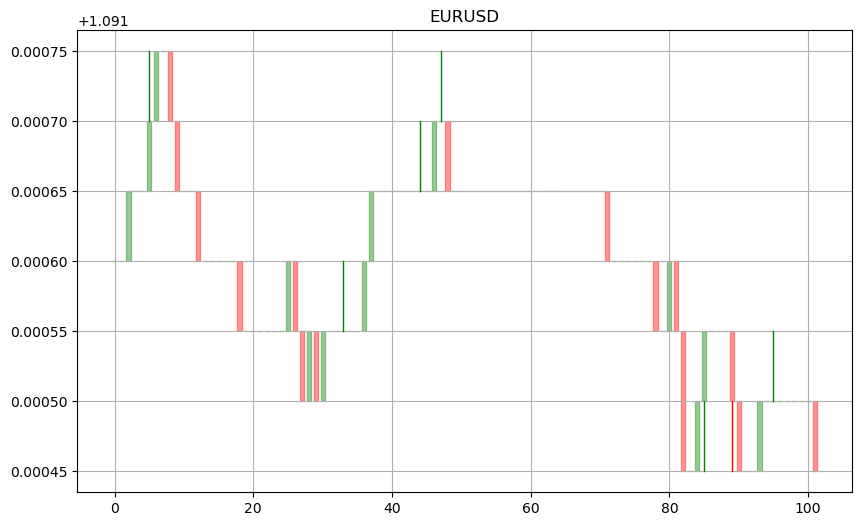

In [16]:
bars.updateEvent += on_bar_update #activates the function

In [18]:
ib.cancelHistoricalData(bars)

Error 162, reqId 18: Historical Market Data Service error message:API historical data query cancelled: 18


In [19]:
ib.disconnect()